In [82]:
import numpy as np
import pandas as pd

In [83]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_dataset = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine_dataset.data.features
y = wine_dataset.data.targets

# print the fetched data
print("X.shape data: ", X.shape)
print("y.shape data: ", y.shape)

X.shape data:  (178, 13)
y.shape data:  (178, 1)


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malicacid                     178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity_of_ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total_phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid_phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color_intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  0D280_0D315_of_diluted_wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
dtypes: fl

In [ ]:
y.value_counts()

class
2        71
1        59
3        48
Name: count, dtype: int64

### Handle Missing values

In [86]:
print("Missing values in X:\n", X.isnull().sum())
print("Missing values in y:\n", y.isnull().sum())

Missing values in X:
 Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64
Missing values in y:
 class    0
dtype: int64


### Feature Scaling

In [87]:
X
.
d
e
s
c
r
i
b
e
(
)

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [88]:
from sklearn.preprocessing import StandardScaler

# Initialize Standard Scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.describe()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.382808e-16,-1.197544e-16,-8.370333e-16,-3.991813e-17,-3.991813e-17,0.000000,-3.991813e-16,3.592632e-16,-1.197544e-16,2.494883e-17,1.995907e-16,3.193450e-16,-1.596725e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-0.885468,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,0.095960,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,0.808997,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [89]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded_target = encoder.fit_transform(y[['class']])
encoded_target_df = pd.DataFrame(encoded_target, columns=encoder.get_feature_names_out(['class']))
encoded_target_df.describe()

,class_1,class_2,class_3
count,178.000000,178.000000,178.000000
mean,0.331461,0.398876,0.269663
std,0.472066,0.491049,0.445037
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


In [90]:
wine_df = pd.concat([X_scaled_df, encoded_target_df], axis=1)
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malicacid                     178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity_of_ash             178 non-null    float64
 4   Magnesium                     178 non-null    float64
 5   Total_phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid_phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color_intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  0D280_0D315_of_diluted_wines  178 non-null    float64
 12  Proline                       178 non-null    float64
 13  class

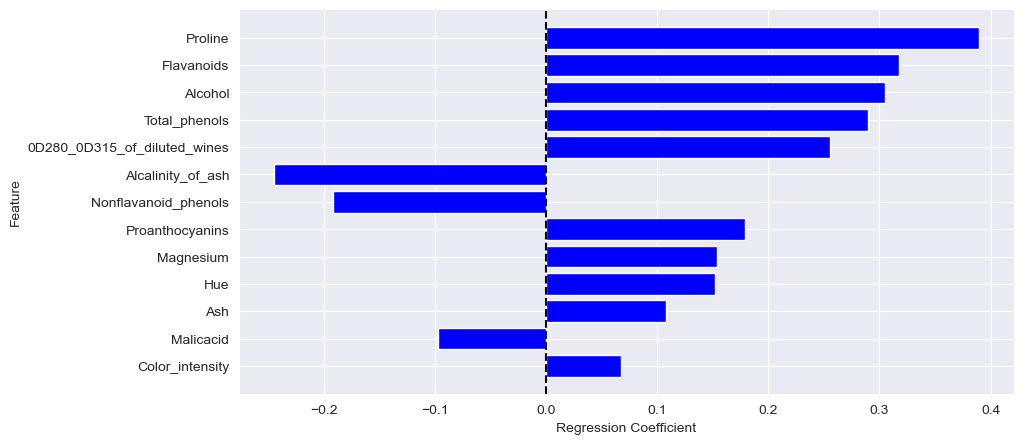

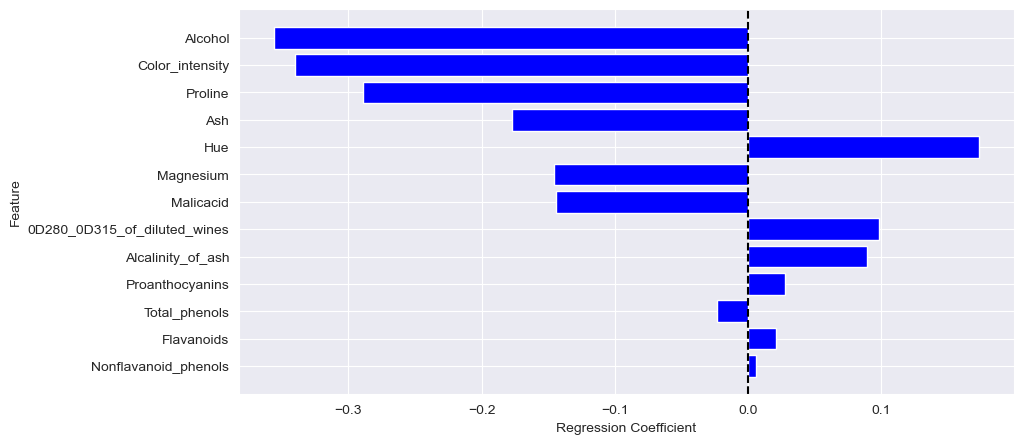

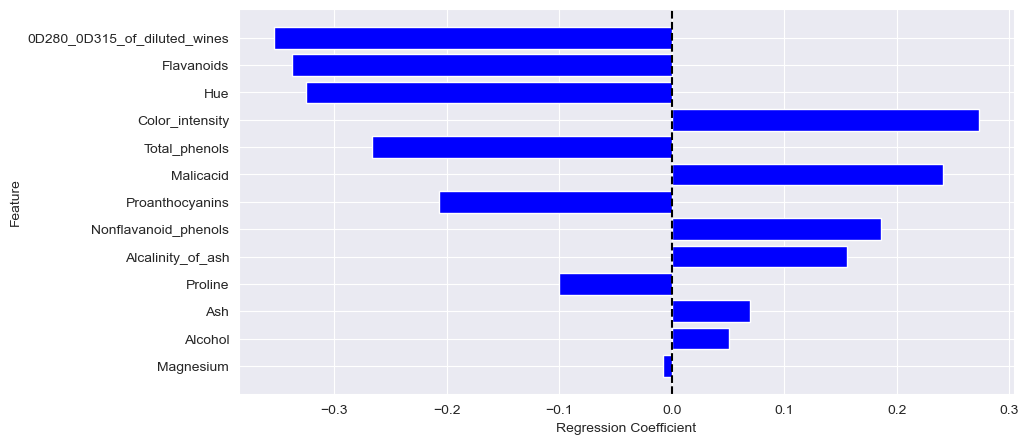

In [91]:
from matplotlib import pyplot as plt
from src.SimpleRegression import SimpleRegression

simple_regression = SimpleRegression()
simple_regression.fit(X_scaled_df, encoded_target_df)

# Get feature importance (D X C)
feature_importance = simple_regression.get_coef()

D, C = feature_importance.shape

for c in range(C):
    coef_class = feature_importance[:, c]

    importance_df = pd.DataFrame({
        'Feature': X_scaled_df.columns,
        'Coefficient': coef_class,
        'Abs_Coefficient': np.abs(coef_class)
    }).sort_values(by='Abs_Coefficient', ascending=False)

    plt.figure(figsize=[10, 5])
    plt.barh(importance_df['Feature'], importance_df['Coefficient'], color='blue')
    plt.xlabel('Regression Coefficient')
    plt.ylabel('Feature')
    plt.axvline(x=0, color='black', linestyle='--')
    plt.gca().invert_yaxis()
    plt.show()

In [116]:
f
e
a
t
u
r
e
_
i
m
p
o
r
t
a
n
c
e

array([[ 0.30467699, -0.35568606,  0.05100907],
       [-0.09689997, -0.14453754,  0.2414375 ],
       [ 0.10792508, -0.17748316,  0.06955808],
       [-0.24461702,  0.08900412,  0.15561291],
       [ 0.15354127, -0.14541723, -0.00812404],
       [ 0.28948524, -0.02316159, -0.26632365],
       [ 0.31716939,  0.02065382, -0.3378232 ],
       [-0.19191078,  0.00581116,  0.18609961],
       [ 0.17911582,  0.02752327, -0.20663909],
       [ 0.06741943, -0.34016133,  0.2727419 ],
       [ 0.15208989,  0.17295702, -0.32504691],
       [ 0.25567248,  0.09784211, -0.35351459],
       [ 0.38930074, -0.28883039, -0.10047036]])

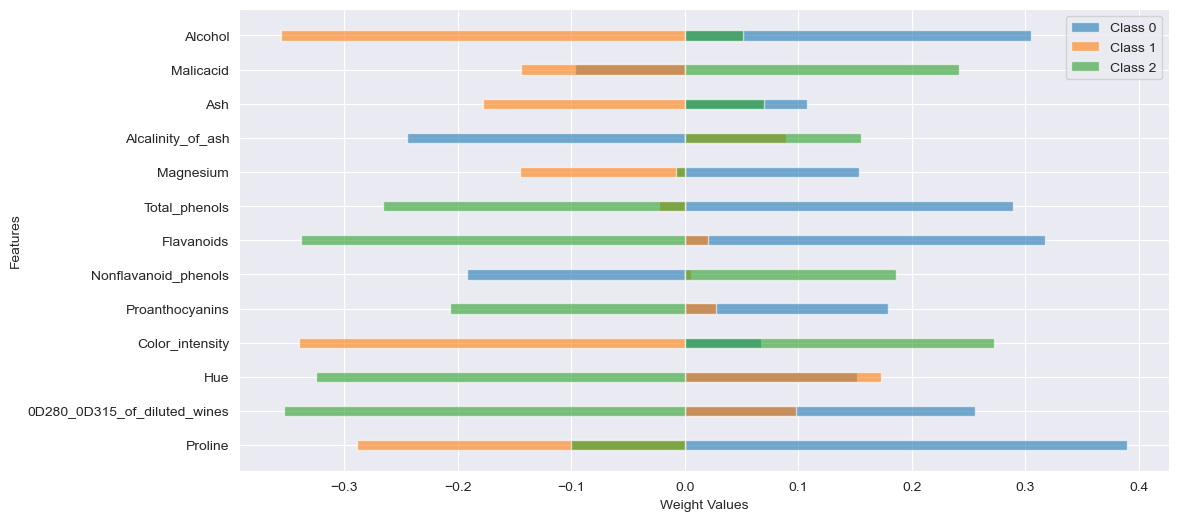

In [92]:
y = np.arange(len(X_scaled_df.columns))
plt.figure(figsize=(12, 6))
for i in range(3):
    plt.barh(y, feature_importance[:, i], height=0.3, alpha=0.6, label=f'Class {i}')

plt.yticks(y, X_scaled_df.columns)
plt.ylabel("Features")
plt.xlabel("Weight Values")
plt.legend()

plt.gca().invert_yaxis()
plt.show()

In [93]:
# Divide the sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, encoded_target_df, test_size=0.2, random_state=42, stratify=encoded_target_df)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (142, 13)
X_test shape: (36, 13)
y_train shape: (142, 3)
y_test shape: (36, 3)


### Helper Function

In [94]:
from sklearn.model_selection import KFold

# K-Fold Cross-Validation
def cross_validate(model, X_input, y_output):
    X_input = np.asarray(X_input)
    y_output = np.asarray(y_output)

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    y = np.zeros_like(y_output)
    yh = np.zeros_like(y_output)

    for train_index, test_index in kf.split(X_input):
        model.fit(X_input[train_index], y_output[train_index])
        y[test_index] = y_output[test_index]
        predictions = model.predict(X_input[test_index])

        _, num_categories = predictions.shape

        if num_categories > 1: # probabilities
            yh[test_index] = predictions
        else:   # Already class labels
            yh[test_index] = predictions.flatten()

    return y, yh

### Multi-Class Linear Regression

In [113]:
from src.GradientDescent import GradientDescent
import numpy as np

class MultiClassLinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias

    def loss_fn_sse(self, X, y, w):
        y_hat = X @ w  # continuous predictions
        return np.sum((y - y_hat) ** 2)

    def gradient_fn_sse(self, X, y, w):
        y_hat = X @ w  # continuous predictions
        return (2 / X.shape[0]) * X.T @ (y_hat - y)

    def softmax(self, x):
        exp_z = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)


    def fit(self, X, y, gradient_descent=GradientDescent().gradient_descent):
        X = np.asarray(X)
        y = np.asarray(y)

        if self.add_bias:   # Add bias into X
            X = np.column_stack([np.ones(X.shape[0]), X])

        A = X.T @ X
        # y = y.reshape(-1, 1)

        if np.linalg.det(A) < 1e-12:   # Check if matrix A is invertible
            self.w = np.linalg.inv(A) @ X.T @ y
        else: # A is singular, use optimization function to fit.
            self.w, loss_history = gradient_descent(self.gradient_fn_sse, self.loss_fn_sse, X, y)
        return loss_history

    def get_weights(self):
        return self.w

    def predict(self, x):
        x = np.asarray(x)

        if self.add_bias: # Add a bias term
            x = np.column_stack([np.ones(x.shape[0]), x])
        y_hat = x @ self.w
        return self.softmax(y_hat)

    def accuracy(self, y, y_hat):
        max_indices = np.argmax(y_hat, axis=1)
        y_one_hot = np.zeros_like(y_hat)
        y_one_hot[np.arange(y_hat.shape[0]), max_indices] = 1
        y = np.asarray(y)

        return np.mean(y_one_hot == y)

In [114]:
# Linear Regression
regression = MultiClassLinearRegression()
y_true, y_hat_mclin = cross_validate(regression, X_train, y_train)
regression.accuracy(y_true, y_hat_mclin)

0.9859154929577465

In [106]:
class MultiClassLogisticRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias

    def softmax(self, x):
        exp_z = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_z / exp_z.sum(axis=1, keepdims=True)

    def loss_fn_cce(self, X, y, w):
        eps = 1e-20
        y_hat = self.softmax(X @ w)

        loss = -np.sum(y * np.log(y_hat + eps), axis=1)
        return np.mean(loss)

    def gradient_fn_cce(self, X, y, w):
        y_hat = self.softmax(X @ w)
        return (1 / X.shape[0]) * X.T @ (y_hat - y)

    def fit(self, X, y, gradient_descent=GradientDescent().gradient_descent):
        X = np.asarray(X)
        y = np.asarray(y)

        if self.add_bias:   # Add bias into X
            X = np.column_stack([np.ones(X.shape[0]), X])

        self.w, loss_history = gradient_descent(self.gradient_fn_cce, self.loss_fn_cce, X, y)

        return loss_history

    def get_weights(self):
        return self.w

    def predict(self, x):
        x = np.asarray(x)

        if self.add_bias: # Add a bias term
            x = np.column_stack([np.ones(x.shape[0]), x])

        y_hat = self.softmax(x @ self.w)
        return y_hat

    def accuracy(self, y, y_hat):
        max_indices = np.argmax(y_hat, axis=1)
        y_one_hot = np.zeros_like(y_hat)
        y_one_hot[np.arange(y_hat.shape[0]), max_indices] = 1
        y = np.asarray(y)

        return np.mean(y_one_hot == y)

    def check_grad(self, X, y):
        X = np.asarray(X)
        y = np.asarray(y)

        if self.add_bias:   # Add bias to X
            X_bias = np.column_stack([np.ones(X.shape[0]), X])
        else:
            X_bias = X

        W = self.w.copy()
        diff = np.zeros_like(W)
        epsilon_val = 1e-4

        D, C = W.shape

        for i in range(D):
            for j in range(C):
                epsilon = np.zeros_like(W)
                epsilon[i, j] = epsilon_val

                W_plus = W + epsilon
                W_minus = W - epsilon
                J1 = self.loss_fn_cce(X_bias, y, W_plus)
                J2 = self.loss_fn_cce(X_bias, y, W_minus)

                numeric_grad = (J1 - J2) / (2 * epsilon[i, j])
                derived_grad = self.gradient_fn_cce(X_bias, y, W)[i, j]

                diff[i, j] = np.square(derived_grad - numeric_grad).sum() / np.square(derived_grad + numeric_grad).sum()

        return diff.sum()

In [107]:
mlr = MultiClassLogisticRegression()
y_true, y_hat_mclog = cross_validate(mlr, X_train, y_train)
mlr.accuracy(y_true, y_hat_mclog)

0.9812206572769953

In [104]:
# Check gradient
mlr.check_grad(X_train, y_train)

6.862111094901091e-15

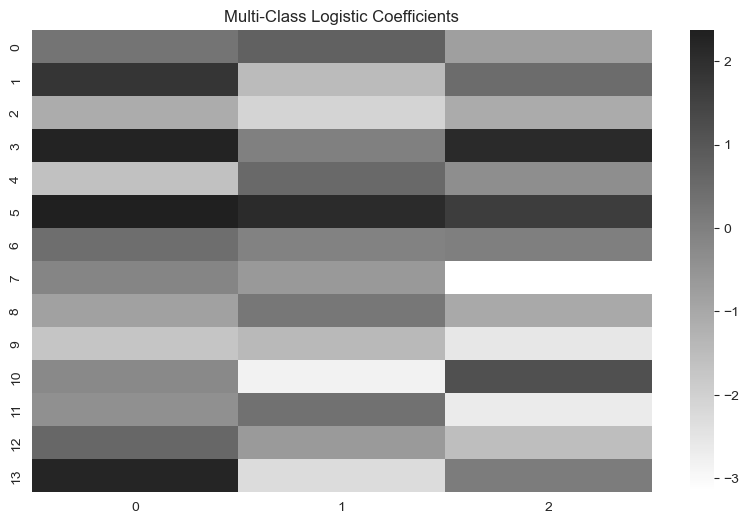

In [111]:
from seaborn import heatmap
W_hat = mlr.get_weights()
plt.figure(figsize=(10, 6))
heatmap(W_hat, cmap='gray_r', center=0)
plt.title('Multi-Class Logistic Coefficients')
plt.show()

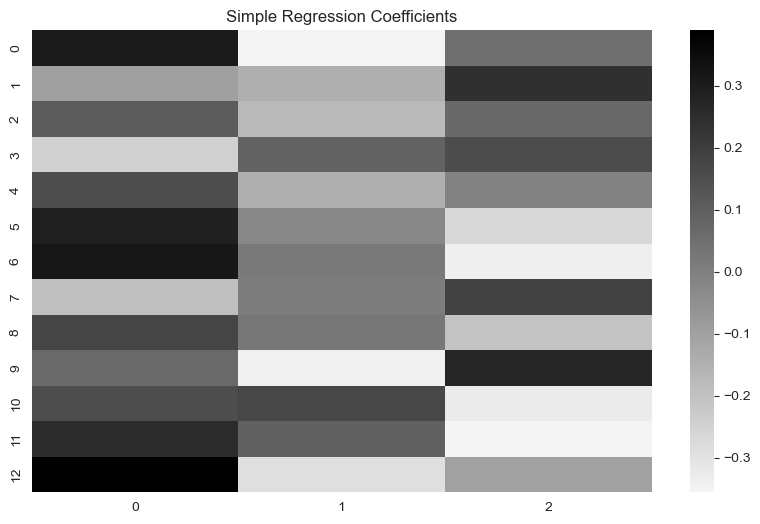

In [112]:
# Weights from Simple Regression
plt.figure(figsize=(10, 6))
heatmap(feature_importance, cmap='gray_r', center=0)
plt.title('Simple Regression Coefficients')
plt.show()

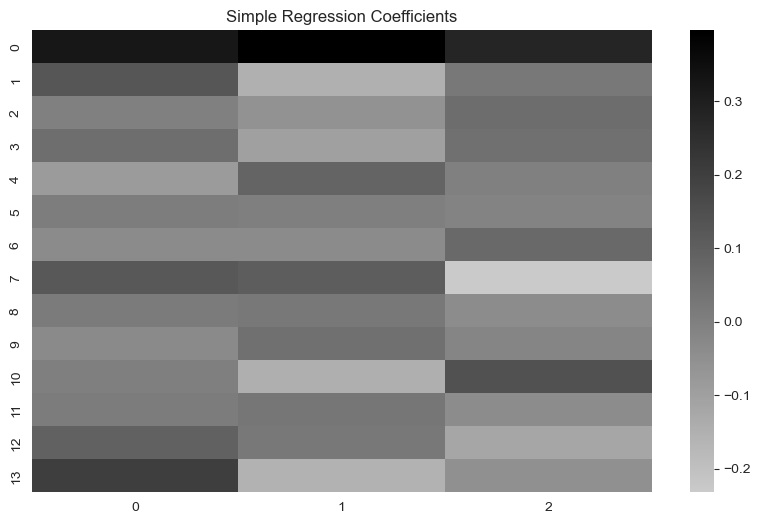

In [115]:
# Weights from Multi-Class Linear Regression
plt.figure(figsize=(10, 6))
heatmap(regression.get_weights(), cmap='gray_r', center=0)
plt.title('Simple Regression Coefficients')
plt.show()

In [99]:
from sklearn.metrics import roc_curve, roc_auc_score

def auroc(y_true, y_pred, title):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)

    plt.clf()
    plt.plot(fpr, tpr, "b-", lw=2, label="AUROC = %0.3f"%auc)
    plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="best")
    plt.show()